In [76]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

In [77]:
houses = pd.read_csv('files/HousingData.csv')
houses.dropna(inplace=True)
houses.drop_duplicates(inplace=True)
corr_matrix = houses.corr()
#c = houses['Avg. Area House Age'].corr(houses['Price'])
#print(c)


In [78]:
houses.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [79]:
df = houses
target_corr = corr_matrix['MEDV']
highest_correlation_feature = target_corr.drop('MEDV').abs().idxmax()
print("highest correlarion ")
print(highest_correlation_feature)
print("end")

highest correlarion 
LSTAT
end


In [80]:
houses.dropna(inplace=True)
houses.drop_duplicates(inplace=True)

In [81]:
houses = houses[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT','MEDV']]
'''df = houses[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
standardized_df = pd.DataFrame(standardized_data,columns=df.columns)
houses[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']] = standardized_df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
s = StandardScaler()
houses['MEDV']=s.fit_transform(np.array(houses['MEDV']).reshape(-1,1))'''

In [82]:
houses.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.400818,0.273342,-1.259620,-0.271237,-0.134687,0.423161,-0.134014,0.135851,-0.974609,-0.656944,-1.496303,0.430740,-1.067126,24.0
1,-0.398535,-0.479051,-0.569724,-0.271237,-0.745475,0.202245,0.357849,0.554334,-0.858633,-0.978184,-0.340879,0.430740,-0.497196,21.6
2,-0.398537,-0.479051,-0.569724,-0.271237,-0.745475,1.298216,-0.281214,0.554334,-0.858633,-0.978184,-0.340879,0.385097,-1.197278,34.7
3,-0.397984,-0.479051,-1.278462,-0.271237,-0.842847,1.029962,-0.830521,1.076829,-0.742657,-1.097162,0.075073,0.405283,-1.346610,33.4
5,-0.385778,0.043444,-0.453775,-0.271237,-0.258615,-0.154950,0.975370,1.023534,-0.510706,-0.567711,-1.542520,0.430740,0.874196,28.7


In [83]:
houses.dropna(inplace=True)

In [84]:
x= houses[[ 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y=houses['MEDV']

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

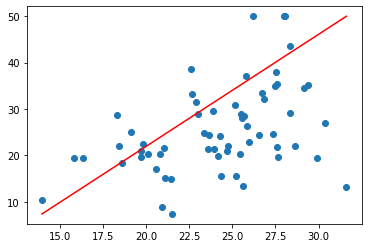

72.36264350605654
R-squared: 0.16773451269889506


In [86]:
import matplotlib.pyplot as plt
predict = lr.predict(x_test)
plt.scatter(predict,y_test)
plt.plot([min(predict),max(predict)],[min(y_test),max(y_test)],color='red')
plt.show()
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
print(mean_squared_error(y_test,predict))
r2 = r2_score(y_test,predict)
print("R-squared:", r2)

In [87]:
'''new_data = pd.DataFrame({
    'Avg. Area Income': [79545.46],
    'Avg. Area House Age': [5.682861],
    'Avg. Area Number of Rooms': [7.009188],
    'Avg. Area Number of Bedrooms': [4.09],
    'Area Population': [23089.8],
})

features = new_data

scaled_features = scaler.transform(features)
print(type(scaled_features))
prediction = lr.predict(scaled_features)

print(prediction)
y_pred_original = s.inverse_transform(prediction.reshape(-1, 1))
print(y_pred_original)'''

"new_data = pd.DataFrame({\n    'Avg. Area Income': [79545.46],\n    'Avg. Area House Age': [5.682861],\n    'Avg. Area Number of Rooms': [7.009188],\n    'Avg. Area Number of Bedrooms': [4.09],\n    'Area Population': [23089.8],\n})\n\nfeatures = new_data\n\nscaled_features = scaler.transform(features)\nprint(type(scaled_features))\nprediction = lr.predict(scaled_features)\n\nprint(prediction)\ny_pred_original = s.inverse_transform(prediction.reshape(-1, 1))\nprint(y_pred_original)"